# Plot when the S&P500 has been up at least 5%

In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [61]:
# core
import time
import sys
from concurrent.futures import ProcessPoolExecutor

# installed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# custom
sys.path.append('../../code')
import data_processing as dp
import short_squeeze_eda as sse
from utils import get_home_dir
HOME_DIR = get_home_dir(repo_name='scrape_stocks')

In [4]:
dfs, sh_int, fin_sh = dp.load_stocks(stocks=None,
                                     verbose=True,
                                     short_interest=False,
                                     TAs=False,
                                     finra_shorts=False,
                                     earliest_date=None)

loading stocks...


In [5]:
len(dfs.keys())

11638

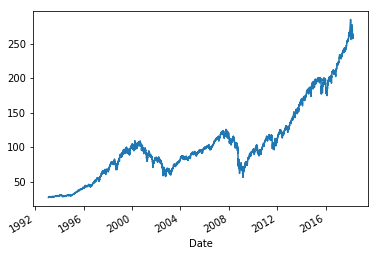

In [8]:
_ = dfs['SPY']['Adj_Close'].plot()

In [9]:
df = dfs['SPY'].copy()

In [17]:
past_days = 1
col = 'Adj_Close'

In [19]:
df[col + 'prev_price_' + str(past_days) + '_days'] = df.iloc[:-past_days][col].tolist() + past_days * [np.nan]

In [33]:
def calc_pct_change(df, past_days=1, col='Adj_Close'):
    """
    calculates the percent change of a stock from past_days days in the past
    """
    df_copy = df.copy()
    prev_price_col = col + '_prev_price_' + str(past_days) + '_days'
    pct_change_col = col + '_pct_change_' + str(past_days) + '_days'
    df_copy[prev_price_col] = past_days * [np.nan] + df_copy.iloc[:-past_days][col].tolist()
    pct_changes = []
    for i, r in df_copy.iloc[past_days:].iterrows():
        pct_changes.append((r[col] - r[prev_price_col]) / r[prev_price_col])
    
    df_copy[pct_change_col] = past_days * [np.nan] + pct_changes
    return df_copy

In [34]:
df = calc_pct_change(dfs['SPY'])

In [35]:
df.head()

,Ticker,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Adj_Close_prev_price_1_days,Adj_Close_pct_change_1_days
Date,,,,,,,,,,,,,,,
1993-01-29,SPY,43.9687,43.9687,43.7500,43.9375,1003200.0,0.0,1.0,27.376159,27.376159,27.239990,27.356733,1003200.0,NaN,NaN
1993-02-01,SPY,43.9687,44.2500,43.9687,44.2500,480500.0,0.0,1.0,27.376159,27.551304,27.376159,27.551304,480500.0,27.356733,0.007112
1993-02-02,SPY,44.2187,44.3750,44.1250,44.3437,201300.0,0.0,1.0,27.531816,27.629133,27.473476,27.609644,201300.0,27.551304,0.002118
1993-02-03,SPY,44.4062,44.8437,44.3750,44.8125,529400.0,0.0,1.0,27.648559,27.920959,27.629133,27.901533,529400.0,27.609644,0.010572
1993-02-04,SPY,44.9687,45.0937,44.4687,45.0000,531500.0,0.0,1.0,27.998787,28.076616,27.687473,28.018275,531500.0,27.901533,0.004184


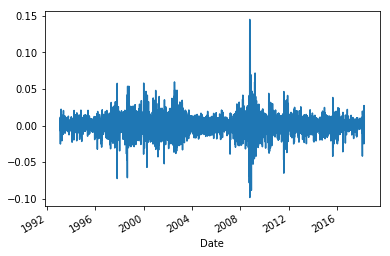

In [36]:
df['Adj_Close_pct_change_1_days'].plot()

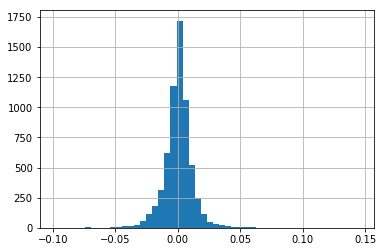

In [38]:
df['Adj_Close_pct_change_1_days'].hist(bins=50)

In [42]:
df = calc_pct_change(dfs['SPY'], past_days=5)

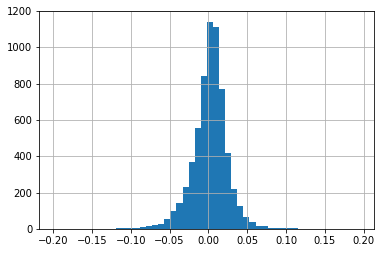

In [43]:
df['Adj_Close_pct_change_5_days'].hist(bins=50)

# idea: predict binary >=0 or arbitrary threshold to get market direction

In [51]:
sp500_companies = pd.read_csv('~/github/s-and-p-500-companies/data/constituents.csv')
# need to replace . with _ for consistency with quandl data
sp500_companies['Symbol'].apply(lambda x: x.replace('.', '_'))
sp500_companies.sort_values(by='Symbol', inplace=True)

In [52]:
sp500_companies

,Symbol,Name,Sector
14,A,Agilent Technologies Inc,Health Care
32,AAL,American Airlines Group,Industrials
8,AAP,Advance Auto Parts,Consumer Discretionary
51,AAPL,Apple Inc.,Information Technology
3,ABBV,AbbVie Inc.,Health Care
39,ABC,AmerisourceBergen Corp,Health Care
2,ABT,Abbott Laboratories,Health Care
4,ACN,Accenture plc,Information Technology
7,ADBE,Adobe Systems Inc,Information Technology
44,ADI,"Analog Devices, Inc.",Information Technology


In [47]:
new_dfs = {}
for s in sp500_companies['Symbol']:
    print(s)
    new_dfs[s] = calc_pct_change(dfs[s], past_days=5)

MMM
AOS
ABT
ABBV
ACN
ATVI
AYI
ADBE
AAP
AMD
AES
AET
AMG
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
AGN
ADS
LNT
ALL
GOOGL
GOOG
MO
AMZN
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
APC
ADI
ANDV
ANSS
ANTM
AON
APA
AIV
AAPL
AMAT
APTV
ADM
ARNC
AJG
AIZ
T
ADSK
ADP
AZO
AVB
AVY
BHGE
BLL
BAC
BAX
BBT
BDX
BRK_B
BBY
BIIB
BLK
HRB
BA
BKNG
BWA
BXP
BSX
BHF
BMY
AVGO
BF_B
CHRW
CA
COG
CDNS
CPB
COF
CAH
KMX
CCL
CAT
CBOE
CBRE
CBS
CELG
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
XEC
CINF
CTAS
CSCO
C
CFG
CTXS
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
GLW
COST
COTY
CCI
CSRA
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DOV
DWDP
DPS
DTE
DUK
DRE
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EVHC
EOG
EQT
EFX
EQIX
EQR
ESS
EL
RE
ES
EXC
EXPE
EXPD
ESRX
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FISV
FLIR
FLS
FLR
FMC
FL
F
FTV
FBHS
BEN
FCX
GPS
GRMN
IT
GD
GE
GGP
GIS
GM
GPC
GILD
GPN
GS
GT
GWW
HAL
HBI
HOG
HRS
HIG
HAS
HCA
HCP
HP
HSIC
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HPQ
HUM
HBAN
HII
ID

In [88]:
new_dfs['SPY'] = calc_pct_change(dfs['SPY'], past_days=5)
new_dfs['UVXY'] = calc_pct_change(dfs['UVXY'], past_days=5)
new_dfs['UPRO'] = calc_pct_change(dfs['UPRO'], past_days=5)

# Calculate correlation with S&P500

In [54]:
from scipy.stats import pearsonr

In [73]:
correlations = []
stocks = []
col = 'Adj_Close_pct_change_5_days'
past_days = 5
spy_len = new_dfs['SPY'].shape[0]
for s in sorted(new_dfs.keys()):
    stocks.append(s)
    max_length = min(new_dfs[s].shape[0], spy_len) - past_days
    correlations.append(pearsonr(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:]))

In [74]:
new_dfs['SPY'][col].values[-max_length:]

array([ 0.00370271,  0.01491247,  0.00642172, ..., -0.00197216,
       -0.00224763, -0.01637056])

In [75]:
new_dfs[s][col].values[-max_length:]

array([ 0.06578523,  0.07221148,  0.08698454, ...,  0.01767   ,
        0.00756824, -0.01027111])

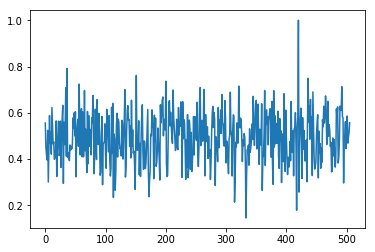

In [76]:
plt.plot([c[0] for c in correlations])

In [77]:
correlations[0]

(0.5561894467696833, 0.0)

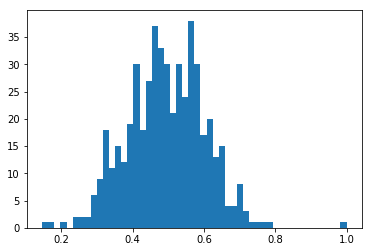

In [78]:
_ = plt.hist([c[0] for c in correlations], bins=50)

In [80]:
np.array(stocks)[np.where(np.array([c[0] for c in correlations]) < 0.3)]

array(['ALXN', 'CHD', 'COO', 'COTY', 'DVA', 'EVHC', 'LH', 'MNST', 'NEM',
       'PCG', 'PRGO', 'REGN', 'SO', 'SRCL', 'XEL'], dtype='<U5')

6335


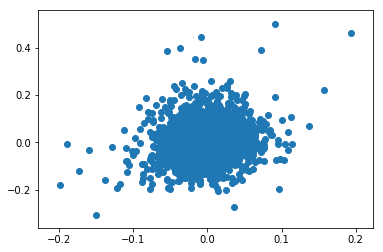

In [84]:
s = 'NEM'
max_length = min(new_dfs[s].shape[0], spy_len) - past_days
print(max_length)
_ = plt.scatter(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:])

5557


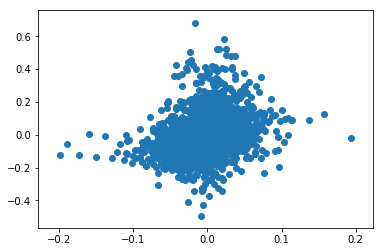

In [85]:
s = 'ALXN'
max_length = min(new_dfs[s].shape[0], spy_len) - past_days
print(max_length)
_ = plt.scatter(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:])

1629
(-0.8038168687452735, 0.0)


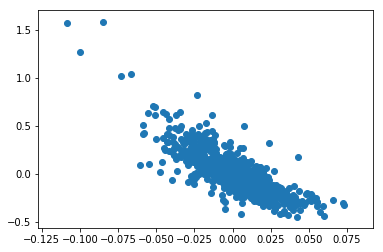

In [92]:
s = 'UVXY'
max_length = min(new_dfs[s].shape[0], spy_len) - past_days
print(max_length)
print(pearsonr(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:]))
_ = plt.scatter(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:])

In [93]:
pearsonr(new_dfs['SPY'][col].values[-max_length:][5:], new_dfs[s][col].values[-max_length:][:-5])

(0.1361854691847625, 3.596840438769752e-08)

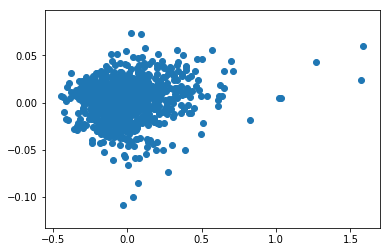

In [95]:
plt.scatter(new_dfs[s][col].values[-max_length:][:-5], new_dfs['SPY'][col].values[-max_length:][5:])

In [100]:
for i in [20, 15, 10, 5, 4, 3, 2, 1]:
    print(pearsonr(new_dfs['SPY'][col].values[-max_length:][i:], new_dfs[s][col].values[-max_length:][:-i]))

print(pearsonr(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:]))

(-0.004339584985055758, 0.8619154011940364)
(0.010049686853984763, 0.6866247663180565)
(0.035621976516740796, 0.15195446550864936)
(0.1361854691847625, 3.596840438769752e-08)
(-0.05436834785922255, 0.028408929199119366)
(-0.24672232157261673, 5.6612098347295944e-24)
(-0.4097520932003277, 6.707958986196255e-67)
(-0.6113831904804895, 1.750845304682726e-167)
(-0.8038168687452735, 0.0)


In [ ]:
dfs['VIXY']

2203
(0.998600216159031, 0.0)


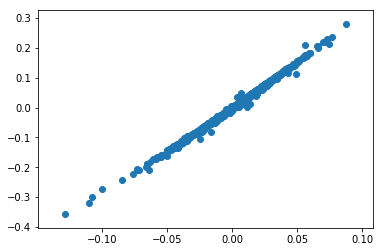

In [90]:
s = 'UPRO'
max_length = min(new_dfs[s].shape[0], spy_len) - past_days
print(max_length)
print(pearsonr(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:]))
_ = plt.scatter(new_dfs['SPY'][col].values[-max_length:], new_dfs[s][col].values[-max_length:])